Columns description:
- **stepMaps** a unit of time in the real world. In this case 1 step is 1 hour of time.
- **typeCASH-IN**, CASH-OUT, DEBIT, PAYMENT and TRANSFER
- **amount** amount of the transaction in local currency
- **nameOrigcustomer** who started the transaction
- **oldbalanceOrginitial** balance before the transaction
- **newbalanceOrigcustomer's** balance after the transaction.
- **nameDestrecipient** ID of the transaction.
- **oldbalanceDestinitial** recipient balance before the transaction.
- **newbalanceDestrecipient's** balance after the transaction.
- **isFraudidentifies** a fraudulent transaction (1) and non fraudulent (0)
- **isFlaggedFraudflags** illegal attempts to transfer more than 200.000 in a single transaction.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# EDA

In [2]:
paysim = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [3]:
paysim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              object
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
paysim['type']=paysim['type'].astype('category')

In [5]:
paysim.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
step              int64
type              category
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: category(1), float64(5), int64(3), object(2)
memory usage: 491.5+ MB


In [6]:
paysim.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
paysim.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [8]:
sns.set_style('whitegrid')

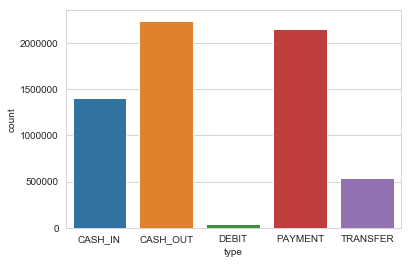

In [9]:
sns.countplot(paysim['type'])

In [10]:
sns.set_style('whitegrid')

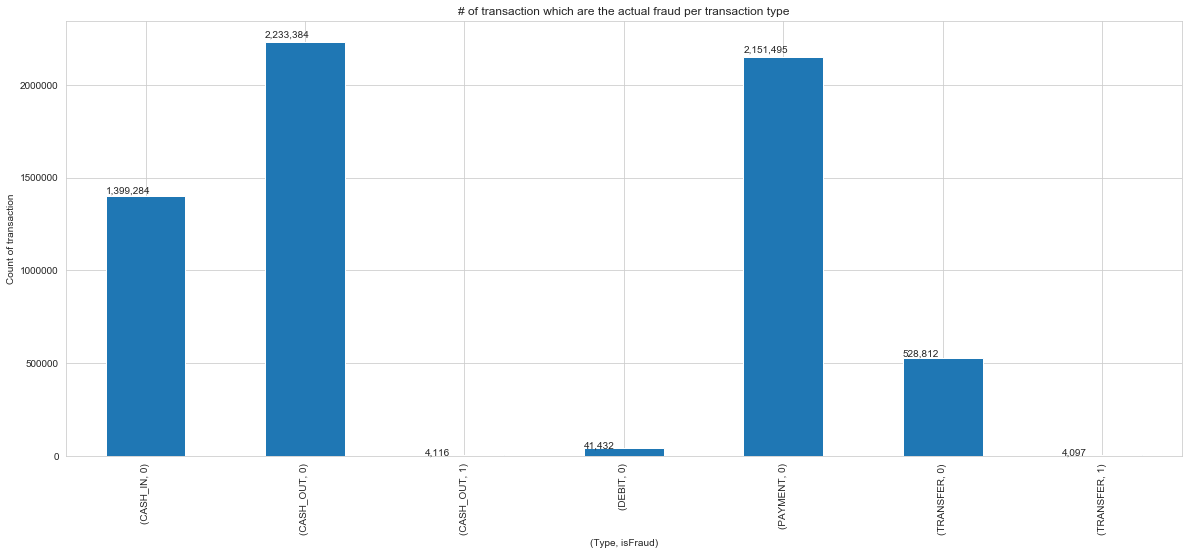

In [11]:
plt.figure(figsize=(20,8))
ax = paysim.groupby(['type', 'isFraud']).size().plot(kind='bar')
ax.set_title("# of transaction which are the actual fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

We can see that fraud transaction is only happen in CASH_OUT and TRANSFER transaction. 

So for the next analysis we will focused on transaction that only happen in CASH_OUT and TRANSFER.

In [12]:
ps_tf_co = paysim[(paysim['type'] == 'TRANSFER') | (paysim['type'] == 'CASH_OUT')] 

In [13]:
ps_tf_co.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2770409 entries, 2 to 6362619
Data columns (total 11 columns):
step              int64
type              category
amount            float64
nameOrig          object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest          object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           int64
isFlaggedFraud    int64
dtypes: category(1), float64(5), int64(3), object(2)
memory usage: 235.1+ MB


In [14]:
ps_tf_co.describe(include=[np.object])

,nameOrig,nameDest
count,2770409,2770409
unique,2768630,509565
top,C1902386530,C1286084959
freq,3,75


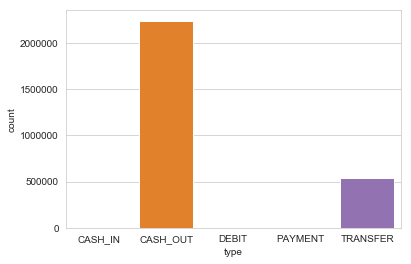

In [15]:
sns.countplot(ps_tf_co['type'])

In [16]:
ps_tf_co['type'].value_counts()

CASH_OUT    2237500
TRANSFER     532909
PAYMENT           0
DEBIT             0
CASH_IN           0
Name: type, dtype: int64

Text(0.5, 1.0, 'fraud transaction amount distribution')

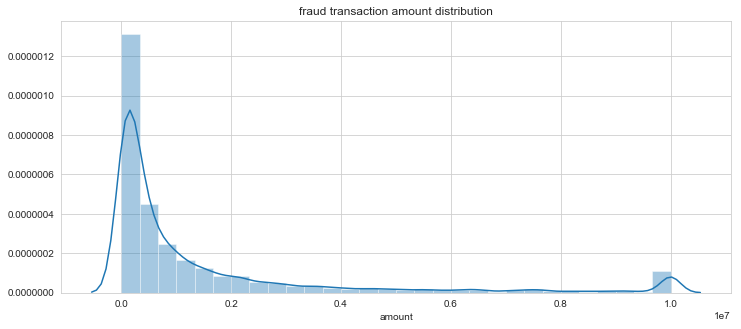

In [17]:
plt.figure(figsize=(12,5))
sns.distplot(ps_tf_co[ps_tf_co['isFraud'] == 1]['amount'],bins=30)
plt.title('fraud transaction amount distribution')

The Frequency distribution of Amount of money involved in Fraud transactions is Positively Skewed.

Fraud transaction mostly involved in lesser amount.

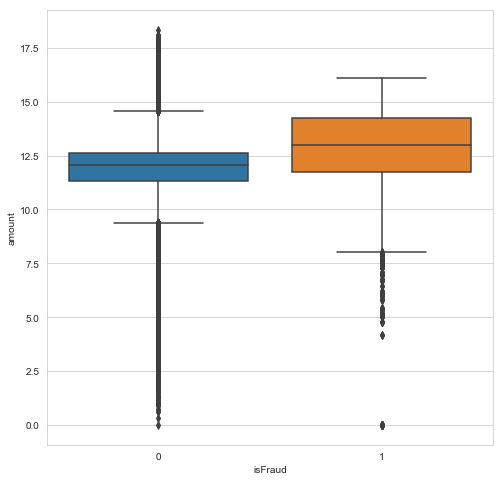

In [18]:
plt.figure(figsize=(8,8))
sns.boxplot(x='isFraud',y=np.log1p(ps_tf_co['amount']),data=ps_tf_co)

From here we can find out that amount involved in fraud transaction is greater than not in fraud transaction.

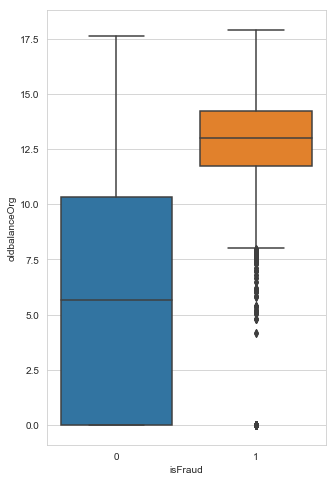

In [19]:
plt.figure(figsize=(5,8))
sns.boxplot(x='isFraud',y=np.log1p(ps_tf_co['oldbalanceOrg']),data=ps_tf_co)

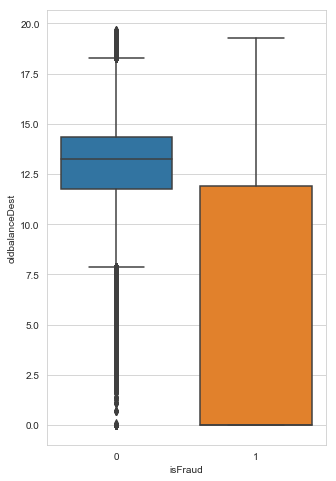

In [20]:
plt.figure(figsize=(5,8))
sns.boxplot(x='isFraud',y=np.log1p(ps_tf_co['oldbalanceDest']),data=ps_tf_co)

oldbalanceOrg are much more higher than oldbalanceDest, so we can assume that fraud transactions are stealing from rich people.

Text(0.5, 1.0, 'fraud transaction amount distribution')

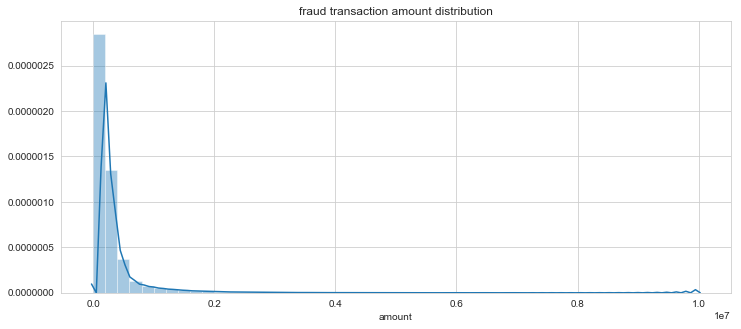

In [21]:
plt.figure(figsize=(12,5))
sns.distplot(ps_tf_co[(ps_tf_co['isFraud'] == 0) & (ps_tf_co['amount']>0) & (ps_tf_co['amount'] < 10000000)]['amount'])
plt.title('fraud transaction amount distribution')

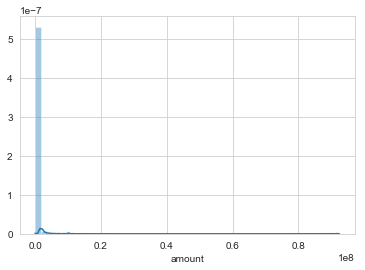

In [22]:
sns.distplot(ps_tf_co['amount'])

We use **log1p** just to ignore the zeroes and visualize the distribution.

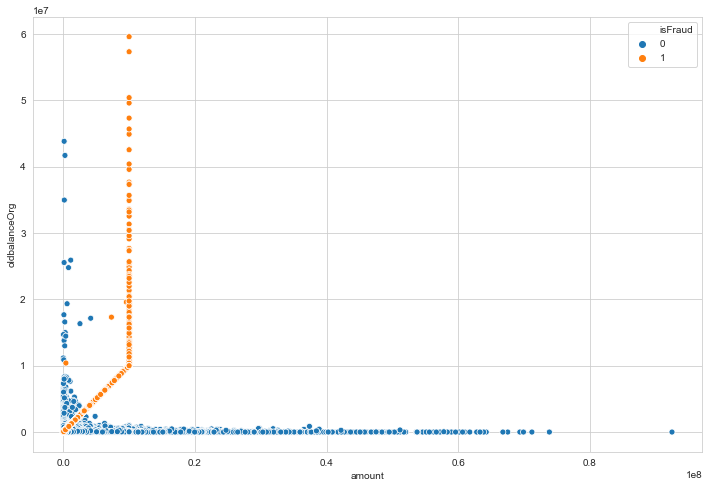

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='amount',y='oldbalanceOrg',hue='isFraud',data=ps_tf_co)

Sepertinya terlihat bahwa semakin besar saldo **oldbalanceOrig** maka jumlah uang yang dicuri juga semakin besar. Namun pada titik tertentu, jumlah uang yang diambil menjadi konstan dalam jumlah yang kecil. Hal ini mungkin dilakukan untuk mengurangi kecurigaan pemilik rekening asli dan pihak bank.

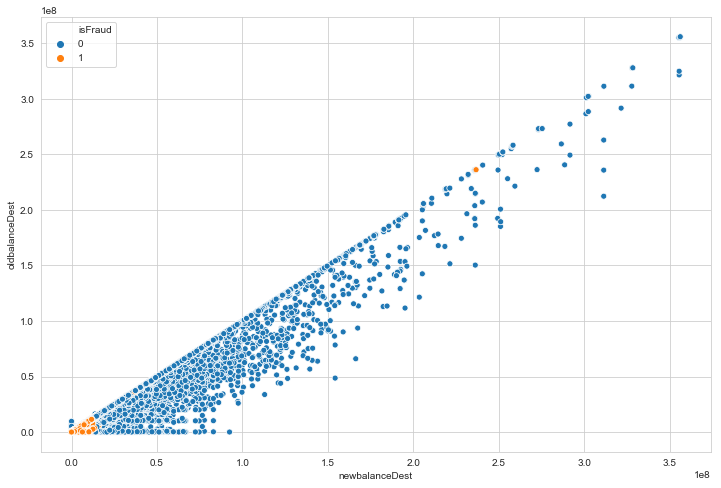

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='newbalanceDest',y='oldbalanceDest',hue='isFraud',data=ps_tf_co)

# Without Oversampling

## Logistic Regression

###  type of transaction combined

In [83]:
ps_tf_co.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,0,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,1,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,1,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,0,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,0,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [84]:
tipe = pd.get_dummies(ps_tf_co['type'],drop_first=True)

In [85]:
ps_tf_co['type'] = tipe

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [86]:
ps_tf_co.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,0,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,1,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,1,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,0,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,0,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [87]:
ps_tf_co.to_csv('paysim_tf_co.csv')

In [108]:
X = ps_tf_co.drop(['isFraud','isFlaggedFraud','nameOrig','nameDest'],axis=1)
y = ps_tf_co['isFraud']

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=101)

In [111]:
from sklearn.linear_model import LogisticRegression

In [112]:
lm = LogisticRegression()

In [113]:
lm.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [114]:
y_pred = lm.predict(X_test)

In [115]:
y_pred_proba = lm.predict_proba(X_test)

In [116]:
from sklearn.metrics import classification_report, matthews_corrcoef, log_loss

In [117]:
print(classification_report(y_test,y_pred))
print(str('matthews corrcoef: ') + str(matthews_corrcoef(y_test,y_pred)))
print(str('log loss: ') + str(log_loss(y_test,y_pred_proba)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828589
           1       0.49      0.43      0.46      2534

    accuracy                           1.00    831123
   macro avg       0.75      0.71      0.73    831123
weighted avg       1.00      1.00      1.00    831123

matthews corrcoef: 0.45874292460499383
log loss: 0.018170622162995552


### Logit

In [121]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.012037
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:                isFraud   No. Observations:              1939286
Model:                          Logit   Df Residuals:                  1939279
Method:                           MLE   Df Model:                            6
Date:                Tue, 26 Nov 2019   Pseudo R-squ.:                  0.3984
Time:                        23:14:42   Log-Likelihood:                -23342.
converged:                       True   LL-Null:                       -38798.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
step              -0.0047   7.09e-05    -65.947      0.000      -0.005      -0.005
type            

### type of TRANSFER only

In [40]:
ps_tf_co.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,0,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,1,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,1,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,0,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,0,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [41]:
ps_tf = ps_tf_co[(ps_tf_co['type'] == 1)] 

In [42]:
ps_tf.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,1,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
15,1,1,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0,0
42,1,1,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0,0
47,1,1,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0,0
48,1,1,5346.89,C512549200,0.00,0.0,C248609774,652637.0,6453430.91,0,0


In [43]:
ps_tf.to_csv('paysim_transfer.csv')

In [132]:
X = ps_tf.drop(['nameOrig','nameDest','isFraud','isFlaggedFraud','type'],axis=1)
y = ps_tf['isFraud']

In [133]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=101)

In [134]:
lm.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [135]:
y_pred = lm.predict(X_test)

In [136]:
y_pred_proba = lm.predict_proba(X_test)

In [137]:
print(classification_report(y_test,y_pred))
print(str('matthews corrcoef: ') + str(matthews_corrcoef(y_test,y_pred)))
print(str('log loss: ') + str(log_loss(y_test,y_pred_proba)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    669962
           1       0.88      0.63      0.73      1288

    accuracy                           1.00    671250
   macro avg       0.94      0.81      0.87    671250
weighted avg       1.00      1.00      1.00    671250

matthews corrcoef: 0.7438946567962563
log loss: 0.003688494486489719


### Logit

In [138]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
print(result.summary())

         Current function value: 0.004609
         Iterations: 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Logit Regression Results                           
Dep. Variable:                isFraud   No. Observations:              1566250
Model:                          Logit   Df Residuals:                  1566244
Method:                           MLE   Df Model:                            5
Date:                Tue, 26 Nov 2019   Pseudo R-squ.:                  0.6511
Time:                        23:29:07   Log-Likelihood:                -7219.4
converged:                      False   LL-Null:                       -20690.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
step              -0.0050      0.000    -41.921      0.000      -0.005      -0.005
amount            -0.0007   1.14e-05    -62.450      0.000      -0.001      -0.001
oldbalanceOrg      0.0007   1.14e-05

### type of CASH_OUT only

In [50]:
ps_co = ps_tf_co[(ps_tf_co['type'] == 0)] 

In [51]:
ps_co.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532909 entries, 2 to 6362618
Data columns (total 11 columns):
step              532909 non-null int64
type              532909 non-null uint8
amount            532909 non-null float64
nameOrig          532909 non-null object
oldbalanceOrg     532909 non-null float64
newbalanceOrig    532909 non-null float64
nameDest          532909 non-null object
oldbalanceDest    532909 non-null float64
newbalanceDest    532909 non-null float64
isFraud           532909 non-null int64
isFlaggedFraud    532909 non-null int64
dtypes: float64(5), int64(3), object(2), uint8(1)
memory usage: 45.2+ MB


In [52]:
ps_co.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,0,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
19,1,0,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0,0
24,1,0,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
58,1,0,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0,0
78,1,0,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0,0


In [53]:
ps_co['step'].max()

743

In [54]:
ps_co.to_csv('paysim_cash_out.csv')

In [149]:
X = ps_co.drop(['nameOrig','nameDest','isFraud','isFlaggedFraud'],axis=1)
y = ps_co['isFraud']

In [156]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=101)

In [151]:
lm.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [152]:
y_pred = lm.predict(X_test)

In [153]:
y_pred_proba = lm.predict_proba(X_test)

In [154]:
print(classification_report(y_test,y_pred))
print(str('matthews corrcoef: ') + str(matthews_corrcoef(y_test,y_pred)))
print(str('log loss: ') + str(log_loss(y_test,y_pred)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    158656
           1       0.94      1.00      0.97      1217

    accuracy                           1.00    159873
   macro avg       0.97      1.00      0.98    159873
weighted avg       1.00      1.00      1.00    159873

matthews corrcoef: 0.9674259722046783
log loss: 0.017715569441900513


### Logit

In [165]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit(method='newton')
print(result.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:                isFraud   No. Observations:              1939286
Model:                          Logit   Df Residuals:                  1939280
Method:                           MLE   Df Model:                            5
Date:                Tue, 26 Nov 2019   Pseudo R-squ.:                    -inf
Time:                        23:32:45   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                       -38798.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
step              -0.0116   7.15e-05   -161.913      0.000      -0.012      -0.011
amount         -9.307

### ignoring type

In [61]:
ps_tf_co.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,0,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,1,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,1,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,0,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,0,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [158]:
X = ps_tf_co.drop(['nameOrig','type','nameDest','isFraud','isFlaggedFraud'],axis=1)
y = ps_tf_co['isFraud']

In [159]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=101)

In [160]:
lm.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [161]:
y_pred = lm.predict(X_test)

In [162]:
y_pred_proba = lm.predict(X_test)

In [163]:
print(classification_report(y_test,y_pred))
print(str('matthews corrcoef: ') + str(matthews_corrcoef(y_test,y_pred)))
print(str('log loss: ') + str(log_loss(y_test,y_pred_proba)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828589
           1       0.49      0.43      0.46      2534

    accuracy                           1.00    831123
   macro avg       0.75      0.71      0.73    831123
weighted avg       1.00      1.00      1.00    831123

matthews corrcoef: 0.45874292460499383
log loss: 0.1065110423493111


### Logit

In [164]:
import statsmodels.api as sm
logit_model = sm.Logit(y_train, X_train)
result = logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: inf
         Iterations 15
                           Logit Regression Results                           
Dep. Variable:                isFraud   No. Observations:              1939286
Model:                          Logit   Df Residuals:                  1939280
Method:                           MLE   Df Model:                            5
Date:                Tue, 26 Nov 2019   Pseudo R-squ.:                    -inf
Time:                        23:31:21   Log-Likelihood:                   -inf
converged:                       True   LL-Null:                       -38798.
Covariance Type:            nonrobust   LLR p-value:                     1.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
step              -0.0116   7.15e-05   -161.913      0.000      -0.012      -0.011
amount         -9.307

## RFC

### type of transaction combined

In [69]:
ps_tf_co.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,0,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,1,1,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,1,1,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,1,0,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,1,0,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
rfc = RandomForestClassifier()

In [122]:
X = ps_tf_co.drop(['isFraud','isFlaggedFraud','nameOrig','nameDest'],axis=1)
y = ps_tf_co['isFraud']

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=101)

In [125]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [126]:
y_pred = rfc.predict(X_test)

In [127]:
y_pred_proba = rfc.predict_proba(X_test)

In [128]:
print(classification_report(y_test,y_pred))
print(str('matthews corrcoef: ') + str(matthews_corrcoef(y_test,y_pred)))
print(str('log loss: ') + str(log_loss(y_test,y_pred_proba)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828589
           1       0.98      0.77      0.86      2534

    accuracy                           1.00    831123
   macro avg       0.99      0.89      0.93    831123
weighted avg       1.00      1.00      1.00    831123

matthews corrcoef: 0.8702787128547895
log loss: 0.008559373518004051


As we can see above, we get much higher matthews corrcoef than using logistic regression. Let's see if we can achieve higher score by treating the data differently.

In [129]:
rfc.feature_importances_

array([0.11924415, 0.12520719, 0.14494881, 0.28948428, 0.03893592,
       0.08364659, 0.19853307])

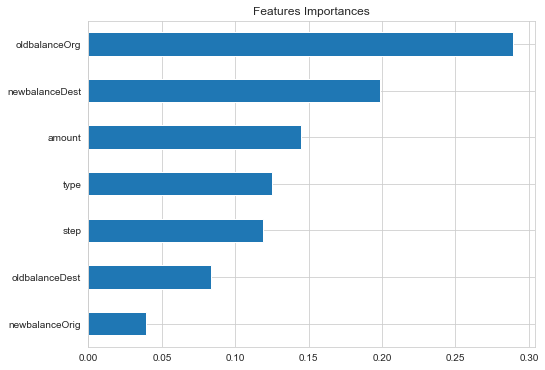

In [131]:
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
coef1 = pd.Series(rfc.feature_importances_,X_train.columns).sort_values(ascending=False)
coef1.sort_values().plot(kind='barh',title='Features Importances')

### type of TRANSFER only

In [100]:
ps_tf.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
3,1,1,181.00,C840083671,181.00,0.0,C38997010,21182.0,0.00,1,0
15,1,1,229133.94,C905080434,15325.00,0.0,C476402209,5083.0,51513.44,0,0
42,1,1,110414.71,C768216420,26845.41,0.0,C1509514333,288800.0,2415.16,0,0
47,1,1,56953.90,C1570470538,1942.02,0.0,C824009085,70253.0,64106.18,0,0
48,1,1,5346.89,C512549200,0.00,0.0,C248609774,652637.0,6453430.91,0,0


In [101]:
X = ps_tf.drop(['isFraud','isFlaggedFraud','nameOrig','nameDest'],axis=1)
y = ps_tf['isFraud']

In [102]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=101)

In [103]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [105]:
y_pred = rfc.predict(X_test)

In [106]:
y_pred_proba = rfc.predict_proba(X_test)

In [107]:
print(classification_report(y_test,y_pred))
print(str('matthews corrcoef: ') + str(matthews_corrcoef(y_test,y_pred)))
print(str('log loss: ') + str(log_loss(y_test,y_pred_proba)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    669962
           1       0.94      0.58      0.72      1288

    accuracy                           1.00    671250
   macro avg       0.97      0.79      0.86    671250
weighted avg       1.00      1.00      1.00    671250

matthews corrcoef: 0.7372053565283814
log loss: 0.010142779623241152


It seems like by using Randon Forest we don't have to seperate the data by it's type since we got much lower score.